## Overview
This project processes GPS motion data collected during 20 sine-wave walking experiments. The program:

Converts geographic coordinates to meters, starting from an origin.
Fits a sine wave to the latitude data using non-linear optimization.
Parses temperature data from accompanying markdown files.
Generates a visualization with displacement over time and corresponding sine-wave fits.
## How to Run the Code
- Step 1: Install requirements: `pip install -r requirements.txt`
- Step 2: Data Preparation: Ensure all CSV and markdown files are in the Data directory.
- step 3: Run tests: `pytest test_final.py`
Step 4: Run the Analysis: Open the final.ipynb notebook and execute all cells to run the analysis and generate the plot

## Bibliography
- Matplotlib Documentation: https://matplotlib.org/stable/contents.html
Used for creating visualizations.

- Pandas Documentation: https://pandas.pydata.org/docs/
Used for CSV data processing.

- Numpy Documentation: https://numpy.org/doc/stable/
Used for mathematical operations.

- Scipy Curve Fitting: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
Used for non - linear sine wave fitting.

- GPS-to-Meters Conversion: Referenced standard approximations for converting latitude and longitude to meters.




/workspaces/CP1-24-final-Forked/Tolani4/Code/final.py:129: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(sine_wave, time, data, p0=p0, maxfev=5000)  # Added maxfev=5000
/workspaces/CP1-24-final-Forked/Tolani4/Code/final.py:129: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(sine_wave, time, data, p0=p0, maxfev=5000)  # Added maxfev=5000
/workspaces/CP1-24-final-Forked/Tolani4/Code/final.py:129: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(sine_wave, time, data, p0=p0, maxfev=5000)  # Added maxfev=5000


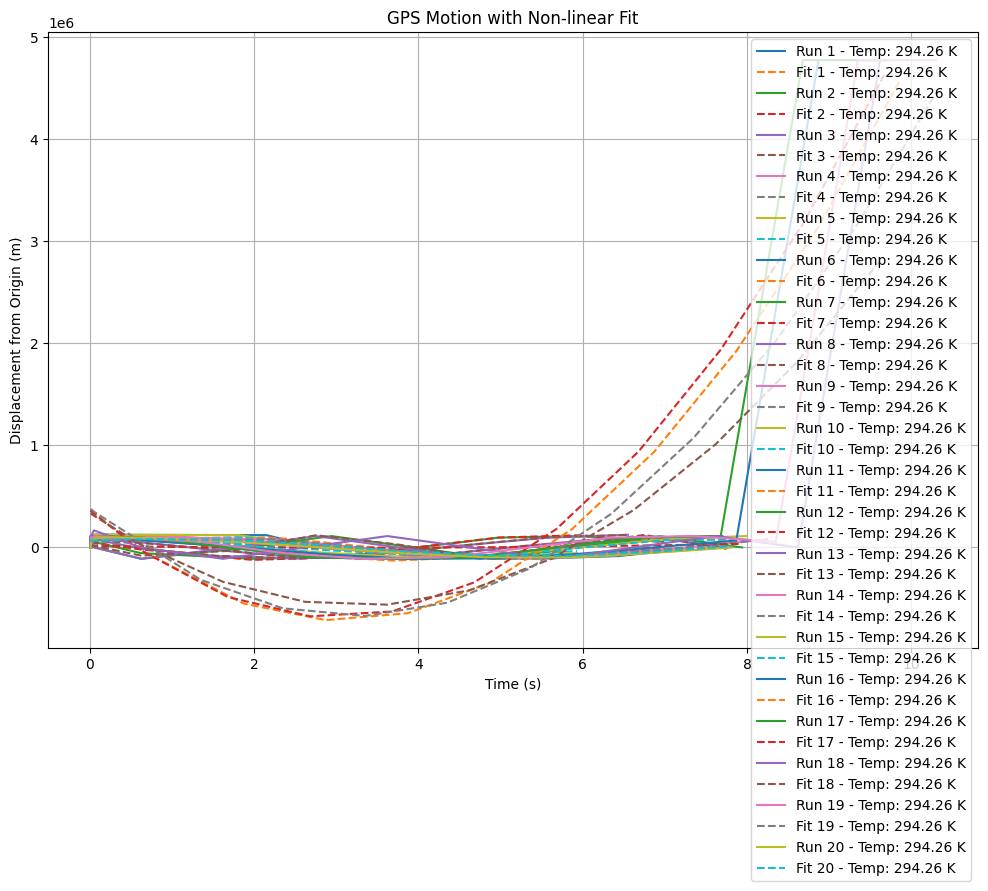

In [16]:
# Import required modules and functions
import sys
sys.path.append("/workspaces/CP1-24-final-Forked")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Tolani4.Code.final import read_csv_data, parse_temperature, fit_sine_wave, sine_wave

# Function to generate the required plot
def generate_gps_motion_figure(csv_files, markdown_files):
    """
    Generates a single figure of GPS motion with the axis in meters and origin at the starting point.
    Includes a non-linear fit using a custom function for each of the 20 repetitions and a legend
    showing the temperature in Kelvin for each run.

    Args:
    csv_files (list): List of file paths for the GPS motion data in CSV format.
    markdown_files (list): List of corresponding markdown files with temperature information.

    Returns:
    None: Displays the plot.
    """
    plt.figure(figsize=(12, 8))

    for i, (csv_file, md_file) in enumerate(zip(csv_files, markdown_files)):
        # Read CSV data
        time, latitude, longitude = read_csv_data(csv_file)

        # Convert latitude and longitude to numpy arrays for element-wise operations
        latitude = np.array(latitude)
        longitude = np.array(longitude)

        # Ensure time is a numpy array for proper mathematical operations
        time = np.array(time)  # Ensure time is a numpy array

        # Set the origin to the starting point
        lat_origin, lon_origin = latitude[0], longitude[0]
        latitude_meters = (latitude - lat_origin) * 111320  # Latitude to meters
        longitude_meters = (longitude - lon_origin) * (111320 * np.cos(np.radians(lat_origin)))

        # Calculate displacement in meters
        displacement = np.sqrt(latitude_meters**2 + longitude_meters**2)

        # Parse temperature from markdown file
        try:
            temperature = parse_temperature(md_file)
        except ValueError as e:
            print(f"Error parsing temperature for {md_file}: {e}")
            continue
        
        # Fit the sine wave to the displacement data
        try:
            popt = fit_sine_wave(time, latitude_meters)
            fitted_latitude = sine_wave(time, *popt)
        except RuntimeError as e:
            print(f"Could not fit sine wave for {csv_file}: {e}")
            continue

        # Plot data and the fitted sine wave
        # Update the label to include the temperature
        label = f"Run {i+1} - Temp: {temperature:.2f} K"
        plt.plot(time, latitude_meters, label=label)
        plt.plot(time, fitted_latitude, '--', label=f"Fit {i+1} - Temp: {temperature:.2f} K")

    # Customize the plot
    plt.xlabel("Time (s)")
    plt.ylabel("Displacement from Origin (m)")
    plt.title("GPS Motion with Non-linear Fit")
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()
# File paths for CSVs and markdowns
csv_files = [
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL001_sinwalk1.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL002_sinwalk2.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL003_sinwalk3.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL004_sinwalk4.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL005_sinwalk5.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL006_sinwalk6.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL007_sinwalk7.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL008_sinwalk8.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL009_sinwalk9.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL010_sinwalk10.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL011_sinwalk11.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL012_sinwalk12.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL013_sinwalk13.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL014_sinwalk14.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL015_sinwalk15.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL016_sinwalk16.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL017_sinwalk17.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL018_sinwalk18.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL019_sinwalk19.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL020_sinwalk20.csv",
]

markdown_files = [
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL001_sinwalk1.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL002_sinwalk2.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL003_sinwalk3.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL004_sinwalk4.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL005_sinwalk5.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL006_sinwalk6.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL007_sinwalk7.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL008_sinwalk8.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL009_sinwalk9.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL010_sinwalk10.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL011_sinwalk11.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL012_sinwalk12.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL013_sinwalk13.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL014_sinwalk14.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL015_sinwalk15.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL016_sinwalk16.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL017_sinwalk17.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL018_sinwalk18.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL019_sinwalk19.md",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL020_sinwalk20.md",

]

# Generate the plot
generate_gps_motion_figure(csv_files, markdown_files)



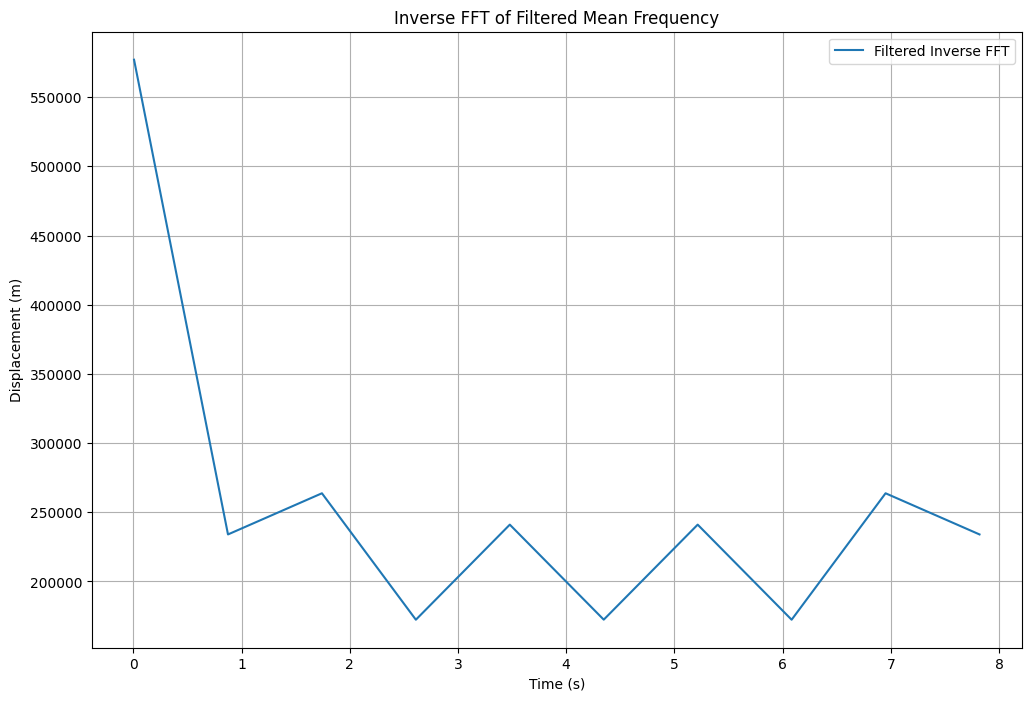

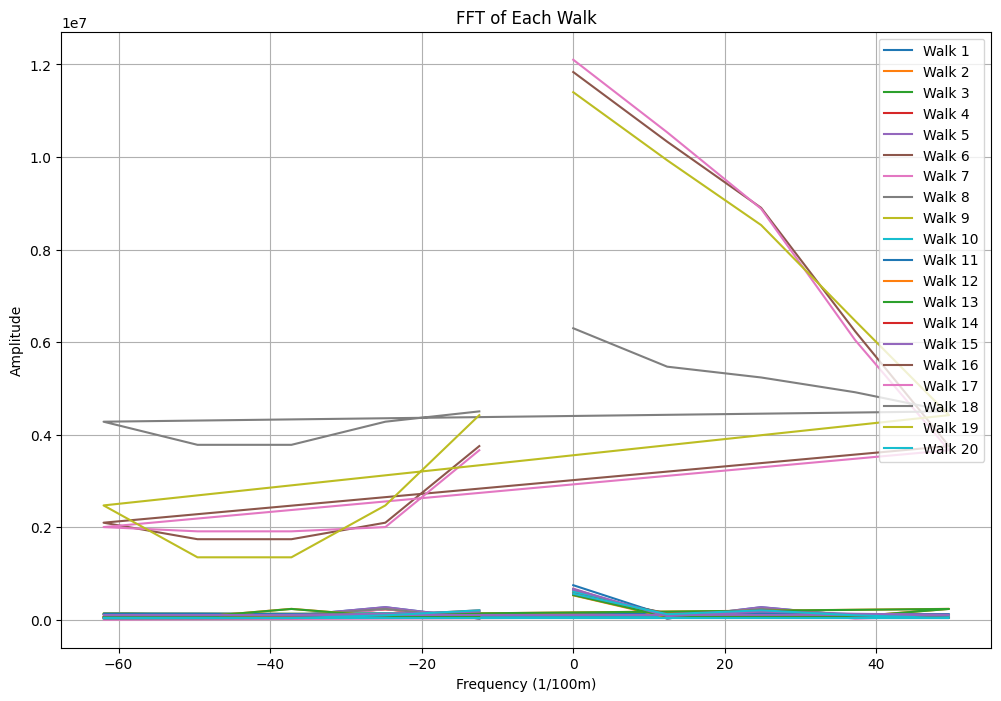

In [17]:
# Import required modules and functions
import sys
sys.path.append("/workspaces/CP1-24-final-Forked")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Tolani4.Code.final import read_csv_data, compute_fft, calculate_frequency_axis

def interpolate_time(time, signal):
    """
    Interpolates the time and signal to equidistant time intervals.
    
    Args:
    time (array-like): Original time values.
    signal (array-like): Signal values corresponding to the time data.
    
    Returns:
    tuple: Interpolated time values and the corresponding signal values.
    """
    # Convert time to a numpy array if it is a list
    time = np.array(time)
    
    # Create a new time array with equidistant intervals
    time_new = np.linspace(time.min(), time.max(), len(time))
    
    # Interpolate the signal data to match the new time array
    signal_new = np.interp(time_new, time, signal)
    
    return time_new, signal_new



# Function to generate the required FFT and inverse FFT plots
def generate_fft_plots(csv_files):
    """
    Generates two figures:
    1. FFT of each walk with frequency in 1/100m.
    2. Inverse FFT of the filtered mean frequency of the walks.

    Args:
    csv_files (list): List of file paths for the GPS motion data in CSV format.

    Returns:
    None: Displays the two plots.
    """
    # Initialize the figure for FFT
    plt.figure(figsize=(12, 8))

    fft_vals_list = []  # List to hold the FFT values of all walks
    freqs_100m = None  # To store the frequency axis once computed

    # Calculate and plot FFT for each walk
    for i, csv_file in enumerate(csv_files):
        # Read CSV data
        time, latitude, longitude = read_csv_data(csv_file)

        # Calculate the displacement
        lat_origin, lon_origin = latitude[0], longitude[0]
        latitude_meters = (np.array(latitude) - lat_origin) * 111320  # Latitude to meters
        longitude_meters = (np.array(longitude) - lon_origin) * (111320 * np.cos(np.radians(lat_origin)))
        displacement = np.sqrt(latitude_meters**2 + longitude_meters**2)

        # Interpolate time and displacement data (if not equidistant)
        time_interpolated, displacement_interpolated = interpolate_time(time, displacement)

        # Compute the FFT and frequencies
        freqs, fft_vals = compute_fft(displacement_interpolated, time_interpolated)

        # Store the frequency axis once (assuming they are the same for all)
        if freqs_100m is None:
            freqs_100m = calculate_frequency_axis(displacement_interpolated, time_interpolated)

        # Ensure the FFT values match the length of the frequency axis
        min_length = min(len(freqs_100m), len(fft_vals))  # Find the minimum length
        freqs_100m = freqs_100m[:min_length]  # Trim freqs_100m
        fft_vals = fft_vals[:min_length]  # Trim fft_vals to match

        fft_vals_list.append(fft_vals)

        # Plot the FFT
        plt.plot(freqs_100m, np.abs(fft_vals), label=f"Walk {i+1}")

    # Customize FFT plot
    plt.xlabel("Frequency (1/100m)")
    plt.ylabel("Amplitude")
    plt.title("FFT of Each Walk")
    plt.legend(loc='upper right')
    plt.grid()

    # Show the plot for FFT
    plt.show()

# Compute the mean frequency for all walks for inverse FFT
# Read CSV data for the first walk (to compute freqs_100m)
time, latitude, longitude = read_csv_data(csv_files[0])

# Calculate the displacement for the first dataset
lat_origin, lon_origin = latitude[0], longitude[0]
latitude_meters = (np.array(latitude) - lat_origin) * 111320
longitude_meters = (np.array(longitude) - lon_origin) * (111320 * np.cos(np.radians(lat_origin)))
displacement = np.sqrt(latitude_meters**2 + longitude_meters**2)

# Interpolate time and displacement data
time_interpolated, displacement_interpolated = interpolate_time(time, displacement)

# Compute the FFT of the displacement for the first dataset
freqs, fft_vals = compute_fft(displacement_interpolated, time_interpolated)

# Define freqs_100m for the frequency axis
freqs_100m = freqs  # Save the frequency axis from the first dataset

# Initialize mean_frequency array
mean_frequency = np.zeros_like(freqs_100m)

# Iterate over all CSV files to compute the mean frequency
for i, csv_file in enumerate(csv_files):
    # Read CSV data again
    time, latitude, longitude = read_csv_data(csv_file)

    # Calculate the displacement
    lat_origin, lon_origin = latitude[0], longitude[0]
    latitude_meters = (np.array(latitude) - lat_origin) * 111320
    longitude_meters = (np.array(longitude) - lon_origin) * (111320 * np.cos(np.radians(lat_origin)))
    displacement = np.sqrt(latitude_meters**2 + longitude_meters**2)

    # Interpolate time and displacement data (if not equidistant)
    time_interpolated, displacement_interpolated = interpolate_time(time, displacement)

    # Compute the FFT of the displacement
    freqs, fft_vals = compute_fft(displacement_interpolated, time_interpolated)

    # Trim or pad the FFT values to match the frequency axis length
    fft_vals = fft_vals[:len(freqs_100m)]  # Trim FFT to match the frequency axis length

    # Accumulate the FFT values to average later
    mean_frequency += np.abs(fft_vals)

# Compute the average frequency
mean_frequency /= len(csv_files)

# Apply a simple filter to keep low frequencies and remove high-frequency noise
filtered_fft_vals = mean_frequency * (freqs_100m < 0.1)  # Keep frequencies below 0.1 (arbitrary threshold)

# Perform inverse FFT on the filtered FFT values
filtered_signal = np.fft.ifft(filtered_fft_vals)

# Ensure time_interpolated has the same length as the filtered_signal
# If the lengths don't match, adjust them by trimming or resampling
if len(filtered_signal) != len(time_interpolated):
    time_interpolated = np.linspace(time_interpolated.min(), time_interpolated.max(), len(filtered_signal))

# Plot the inverse FFT signal
plt.figure(figsize=(12, 8))
plt.plot(time_interpolated, np.real(filtered_signal), label="Filtered Inverse FFT")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Inverse FFT of Filtered Mean Frequency")
plt.legend(loc='upper right')
plt.grid()

# Show the plot for inverse FFT
plt.show()



# File paths for CSVs
csv_files = [
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL001_sinwalk1.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL002_sinwalk2.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL003_sinwalk3.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL004_sinwalk4.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL005_sinwalk5.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL006_sinwalk6.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL007_sinwalk7.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL008_sinwalk8.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL009_sinwalk9.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL010_sinwalk10.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL011_sinwalk11.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL012_sinwalk12.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL013_sinwalk13.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL014_sinwalk14.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL015_sinwalk15.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL016_sinwalk16.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL017_sinwalk17.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL018_sinwalk18.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL019_sinwalk19.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL020_sinwalk20.csv",
]

# Generate the FFT and inverse FFT plots
generate_fft_plots(csv_files)